## Multiclass classification - Fetal_health

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,auc,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('./fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


### Information about the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

### checking null values

In [4]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

### Checking duplicated values

In [5]:
df.duplicated().sum()

13

In [6]:
df.drop_duplicates(inplace=True)

### Checking unique value of the target variable

In [7]:
df['fetal_health'].unique()

array([2., 1., 3.])

There are 3 unique values in the target column. 

### Selcting target variable

In [8]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

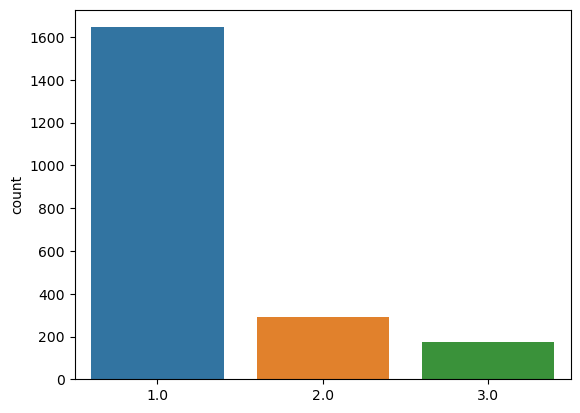

In [9]:
sns.countplot(x=y)
plt.show()

### Over sampling using SMOTE

In [10]:
smote = SMOTE(random_state=42)

In [11]:
x_smote,y_smote = smote.fit_resample(x,y)

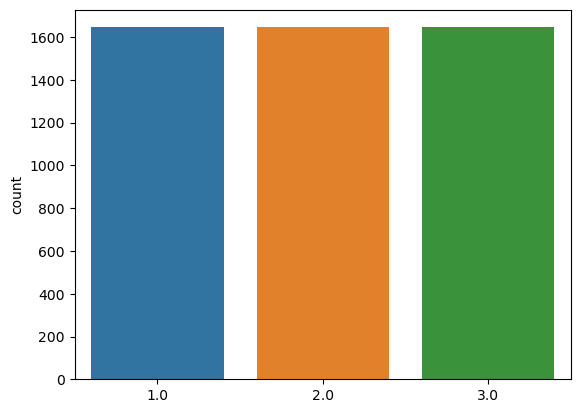

In [12]:
sns.countplot(x=y_smote)
plt.show()

### We have to binirize the target

In [13]:
df['fetal_health'].unique() # 'fetal_health' column represents targest column

array([2., 1., 3.])

In [14]:
y =label_binarize(y_smote ,classes =[1.0, 2.0, 3.0])
n_class = 3

In [15]:
y

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

### Scaling to avoid bias

In [16]:
sc = StandardScaler()

In [17]:
x = sc.fit_transform(x_smote)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

### Initilizing classifier

In [19]:
clf = OneVsRestClassifier(RandomForestClassifier(random_state=42))
model = clf.fit(x_train,y_train)
y_score = model.predict_proba(x_test)

In [20]:
y_score

array([[0.58, 0.22, 0.  ],
       [0.05, 0.06, 0.97],
       [0.96, 0.03, 0.  ],
       ...,
       [0.99, 0.  , 0.  ],
       [0.  , 0.03, 0.99],
       [0.  , 0.97, 0.09]])

In [21]:
y_test

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

### Computing auc and roc for each class

In [22]:
fpr = dict() # false positive rate
tpr = dict() # true positive rate
roc_auc = dict() # AUC value for each class.

for i in range(n_class):
    fpr[i],tpr[i],_ = roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])

In [23]:
fpr.keys()

dict_keys([0, 1, 2])

In [24]:
roc_auc

{0: 0.9979096347680345, 1: 0.9964217252396167, 2: 0.9998280267295597}

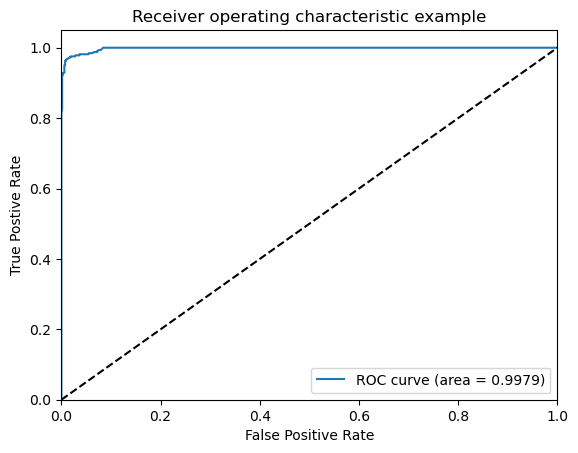

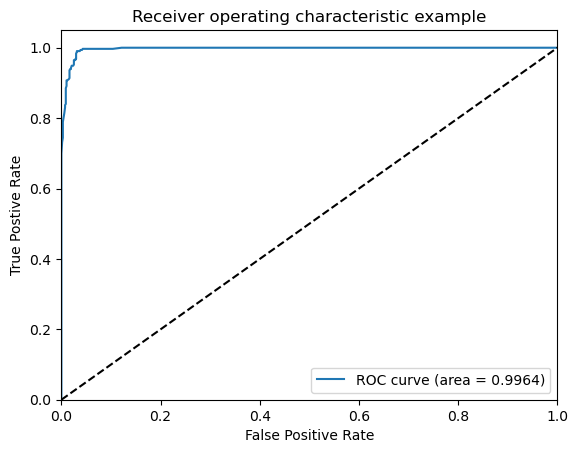

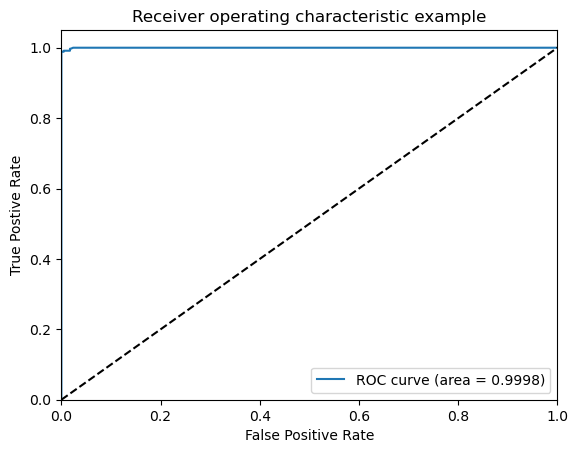

In [25]:
for i in range (n_class):
    plt.figure()
    plt.plot(fpr[i],tpr[i],label = 'ROC curve (area = %0.4f)' % roc_auc[i]) # Here i comes as the key of the dictionary
    plt.plot([0,1],[0,1],'k--') # Diagonal line based on random guessing
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Postive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='lower right')
    plt.show()

### Model accuracy(Training and Testing)

In [26]:
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
accuracy_score_train = accuracy_score(y_train,y_pred_train)*100
accuracy_score_test = accuracy_score(y_test,y_pred_test)*100
print('Training accuracy :',(accuracy_score_train))
print('Testing accuracy: ',accuracy_score_test)

Training accuracy : 99.9493670886076
Testing accuracy:  96.76113360323887


In [27]:
print('Wrong prediction made is: ', (y_pred_test != y_test).sum(),'/',len(y_test))

Wrong prediction made is:  52 / 988


#### Alternative method: 

In [28]:
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

##### Binarizing output

In [29]:
y = label_binarize(y_smote,classes = [1.0,2.0,3.0])
n_classes = 3

In [30]:
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=42))
model = classifier.fit(x_train,y_train)
y_score = model.predict_proba(x_test)

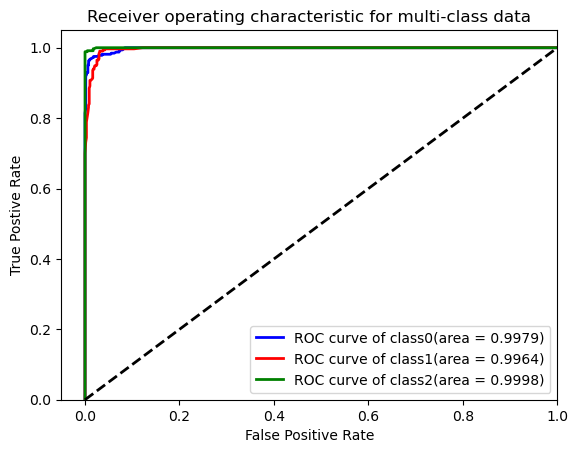

In [31]:
fpr =dict()
tpr = dict()
roc_auc = dict()
lw = 2
for i in range(n_classes):
    fpr[i],tpr[i],_ = roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])
colors = cycle(['blue','red','green'])
for i,color in zip(range(n_classes),colors):
    plt.plot(fpr[i],tpr[i],color = color,lw=2,
        label = 'ROC curve of class{0}(area = {1:0.4f})'.format(i,roc_auc[i]))
plt.plot([0,1],[0,1],'k--',lw=lw)
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc='lower right')
plt.show()